In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
    #for filename in filenames:
        #print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#import more libraries:
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras.layers as layers
from tensorflow.keras.preprocessing import image_dataset_from_directory

In [3]:
import matplotlib.pyplot as plt
import warnings

In [5]:
# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    #os.environ['PYTHONHASHSEED'] = str(seed)
    #os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed()

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


In [8]:
ds_train_ = image_dataset_from_directory('training_set',
                                            label_mode='binary', image_size=[128, 128],
                                             batch_size=64)

Found 8005 files belonging to 2 classes.


In [9]:
ds_test_ = image_dataset_from_directory('test_set',
                                            label_mode='binary', image_size=[128, 128],
                                             batch_size=64, shuffle=False)

Found 2023 files belonging to 2 classes.


In [10]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_test = (
    ds_test_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [11]:
model = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same',
                  input_shape=[128, 128, 3]),
    layers.MaxPool2D(),
    layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same'),
    layers.MaxPool2D(),
    layers.Flatten(),
    #layers.Dense(units=6, activation="relu"),
    layers.Dense(units=1, activation="sigmoid"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 32768)             0         
_________________________________________________________________
dense (Dense)                (None, 1)                 32769     
Total params: 42,913
Trainable params: 42,913
Non-trainable params: 0
____________________________________________________

In [16]:
#3. Train
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['binary_accuracy']
)

In [17]:
history = model.fit(
    ds_train,
    validation_data=ds_test,
    epochs=2,
)

Epoch 1/2
126/126 [==============================] - 133s 1s/step - loss: 2.6692 - binary_accuracy: 0.5485 - val_loss: 0.6860 - val_binary_accuracy: 0.5650
Epoch 2/2
126/126 [==============================] - 136s 1s/step - loss: 0.6380 - binary_accuracy: 0.6341 - val_loss: 0.6734 - val_binary_accuracy: 0.5966


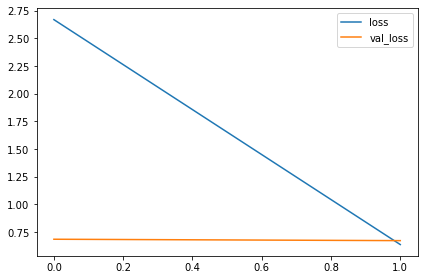

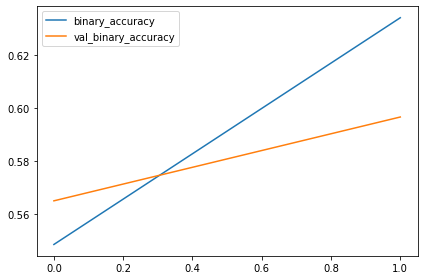

In [18]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();